# Test Content Based Algorithms

By Anthony

# Load Data

In [1]:
from recom_system.algorithms.io import get_books

books = get_books()

In [2]:
from recom_system.algorithms.preprocessing import get_ratings_datasets


trainset, testset = get_ratings_datasets(train_size=1, drop_zero=True)
print(f'{len(trainset.raw_ratings)=}, {len(testset)=}')


len(trainset.raw_ratings)=363099, len(testset)=0


In [3]:
type(trainset)

surprise.dataset.DatasetAutoFolds

In [4]:
type(testset)

numpy.ndarray

In [20]:
import numpy as np


def summarize_n(algo, data, n=[5, 10, 15], measures=['ndcg', 'precision']):
    results = {n: [] for n in measures}
    for k in n:
        ms = [f'{name}@{k}' for name in measures]
        res = cross_validate(algo, data, measures=ms)
        for m in ms:
            results[m.split('@')[0]].append(np.mean(res[m]))
    return results

## Sentence Embeddings from Title and Description

In [22]:
from recom_system.algorithms.models.vector_based.sentence_embeddings import build_item_matrix
from recom_system.algorithms.models.vector_based import VectorBasedModel
from recom_system.algorithms.metrics import cross_validate

sent_profiles = build_item_matrix(books)
sent_model = VectorBasedModel(sent_profiles)
sent_result = summarize_n(sent_model, trainset)
sent_result

{'ndcg': [0.9781389413859841, 0.9807693417594171, 0.9812439978453501],
 'precision': [0.75144651967467, 0.7507702586800784, 0.7507116572060548]}

## TF-IDF from field popular_shelves

In [23]:
from recom_system.algorithms.models.dict_based.popular_shelves import build_item_profile
from recom_system.algorithms.models.dict_based import DictBasedModel
from recom_system.algorithms.metrics import cross_validate

shelf_profiles = build_item_profile(books)
shelf_model = DictBasedModel(shelf_profiles)
shelf_result = summarize_n(shelf_model, trainset)
shelf_result

{'ndcg': [0.9777131499044455, 0.980272369020468, 0.9807151871607955],
 'precision': [0.7512565773625886, 0.7512335625711438, 0.7521831092271417]}

## Comparison

Text(0.5, 1.0, 'Precision@K')

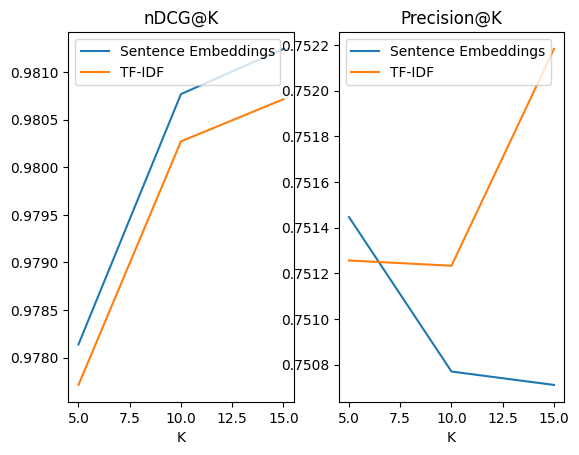

In [26]:
import numpy as np
from matplotlib import pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2)

x = [5, 10, 15]
ax1.plot(x, sent_result['ndcg'], label='Sentence Embeddings')
ax1.plot(x, shelf_result['ndcg'], label='TF-IDF')
ax1.legend()
ax1.set_xlabel('K')
ax1.set_title("nDCG@K")

ax2.plot(x, sent_result['precision'], label='Sentence Embeddings')
ax2.plot(x, shelf_result['precision'], label='TF-IDF')
ax2.legend()
ax2.set_xlabel('K')
ax2.set_title("Precision@K")